In [1]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [2]:
crime_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Training_and_Test_Set.csv"
df_Crime = pd.read_csv(crime_file)

hold_out_file = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Mini-Lab\\Data\\Hold_Out_Set.csv"
df_holdout = pd.read_csv(hold_out_file)

In [3]:
df_Crime.head(5)

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


In [4]:
df_Crime = df_Crime.dropna()

In [5]:
df_Crime.shape

(528873, 18)

In [6]:
#Value Counts by Crime Type
df_Crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [7]:
X = df_Crime[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y = df_Crime[['y']]

In [8]:
#first, let's balance the classes

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X_train
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1

os = SMOTE(random_state=0)
#here, we are splitting the data into train and test so that we only balance the training data and leave the test set as is
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violent in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of viloent",len(os_data_y[os_data_y['y']==1]))
print("Proportion of non-violent data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of violent data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  584782
Number of non-violent in oversampled data 292391
Number of viloent 292391
Proportion of non-violent data in oversampled data is  0.5
Proportion of violent data in oversampled data is  0.5


In [9]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#use the balanced training set from above for 
X_train = os_data_X
y_train = os_data_y

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = X_train.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_test
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [10]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

In [11]:
#prep the hold out set
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC','ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime']
columns_no_change = ['Duration','Duration_to_PD','Day','Year','GeoCell','GeoCell_X','GeoCell_Y']

X_holdout = df_holdout[['JURIS_DESC','BORO_NM','ADDR_PCT_CD','LOC_OF_OCCUR_DESC','PREM_TYP_DESC','Day_Name','Duration','Duration_to_PD','Month','Day','Year','Duration_lbl','Season','Daytime','GeoCell','GeoCell_X','GeoCell_Y']]
y_holdout = df_holdout[['y']]

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X_holdout[columns_to_encode])

#concatenate processed columns back together for X_train
X_holdout = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X_holdout)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X_holdout = df1

columns_to_scale = ['Duration','Duration_to_PD']
#get a list of all columns without the columns to scale above
lstCols = X_holdout.columns.values.tolist()
lstCols.remove('Duration')
lstCols.remove('Duration_to_PD')
columns_no_change = lstCols

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_holdout
scaled_columns = scaler.transform(X_holdout[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_holdout_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_holdout_np)
#get the column names back to the dataframe
#feature_names = ohe.get_feature_names().tolist()
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_holdout = df1

In [12]:
#columns to keep
cols = ['Duration','x0_HEALTH & HOSP CORP','x0_N.Y. POLICE DEPT','x1_MANHATTAN','x1_STATEN ISLAND','x4_ABANDONED BUILDING','x4_ATM','x4_BANK','x4_BAR/NIGHT CLUB','x4_BEAUTY & NAIL SALON','x4_BUS (NYC TRANSIT)','x4_BUS (OTHER)','x4_BUS STOP','x4_BUS TERMINAL','x4_CANDY STORE','x4_CHAIN STORE','x4_CHECK CASHING BUSINESS','x4_CLOTHING/BOUTIQUE','x4_COMMERCIAL BUILDING','x4_DEPARTMENT STORE','x4_DOCTOR/DENTIST OFFICE','x4_DRUG STORE','x4_FACTORY/WAREHOUSE','x4_FAST FOOD','x4_FERRY/FERRY TERMINAL','x4_FOOD SUPERMARKET','x4_GROCERY/BODEGA','x4_GYM/FITNESS FACILITY','x4_HOSPITAL','x4_HOTEL/MOTEL','x4_JEWELRY','x4_LIQUOR STORE','x4_OTHER','x4_PARK/PLAYGROUND','x4_PRIVATE/PAROCHIAL SCHOOL','x4_PUBLIC BUILDING','x4_PUBLIC SCHOOL','x4_RESIDENCE - APT. HOUSE','x4_RESIDENCE - PUBLIC HOUSING','x4_RESIDENCE-HOUSE','x4_RESTAURANT/DINER','x4_SHOE','x4_SOCIAL CLUB/POLICY','x4_STREET','x4_TELECOMM. STORE','x4_VARIETY STORE','x5_Saturday','x5_Sunday','x6_July','x6_May','x8_Summer','x9_Day']

X_train=X_train[cols]
y_train=y_train['y']

X_test = X_test[cols]
y_test=y_test['y']

X_holdout=X_holdout[cols]
y_holdout=y_holdout['y']

In [13]:
X_holdout.head(5)

,Duration,x0_HEALTH & HOSP CORP,x0_N.Y. POLICE DEPT,x1_MANHATTAN,x1_STATEN ISLAND,x4_ABANDONED BUILDING,x4_ATM,x4_BANK,x4_BAR/NIGHT CLUB,x4_BEAUTY & NAIL SALON,...,x4_SOCIAL CLUB/POLICY,x4_STREET,x4_TELECOMM. STORE,x4_VARIETY STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x8_Summer,x9_Day
0,-0.425239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.245919,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.425239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.037024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.425239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train.head(5)

,Duration,x0_HEALTH & HOSP CORP,x0_N.Y. POLICE DEPT,x1_MANHATTAN,x1_STATEN ISLAND,x4_ABANDONED BUILDING,x4_ATM,x4_BANK,x4_BAR/NIGHT CLUB,x4_BEAUTY & NAIL SALON,...,x4_SOCIAL CLUB/POLICY,x4_STREET,x4_TELECOMM. STORE,x4_VARIETY STORE,x5_Saturday,x5_Sunday,x6_July,x6_May,x8_Summer,x9_Day
0,2.499288,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.425239,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.454814,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.425239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.425239,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#split into training and test -- I skip here because I already have the data split above
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
clf = RandomForestClassifier(n_estimators = 50, random_state = 0)

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(clf, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
print('Cross Validation Results: {}'.format(cv_results))

Cross Validation Results: [0.77627866 0.77708237 0.77442799 0.7747187  0.77540272 0.77610383
 0.78121687 0.77442799 0.77978043 0.77299155]


In [19]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<AxesSubplot:>

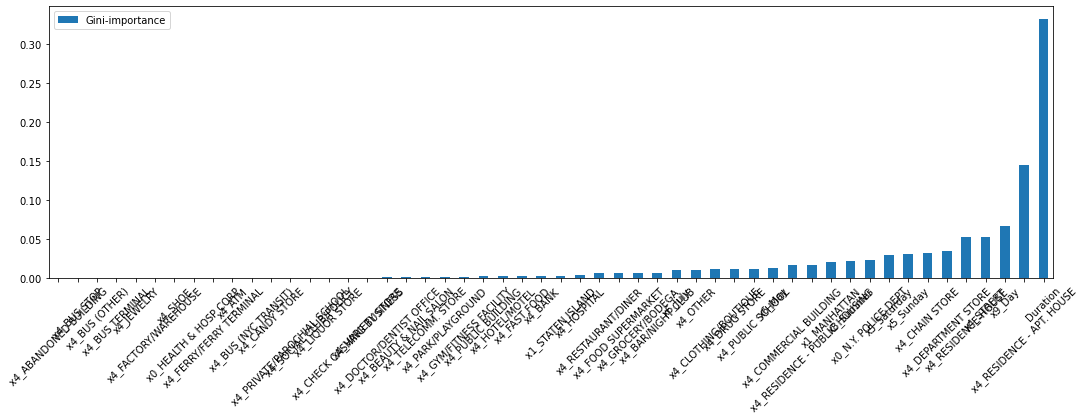

In [20]:
#get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(figsize=(18,5),kind='bar', rot=45)

In [21]:
df_top_features = importances[importances['Gini-importance']>.0045]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gini-importance,feature
Duration,0.332102,Duration
x4_RESIDENCE - APT. HOUSE,0.144563,x4_RESIDENCE - APT. HOUSE
x9_Day,0.066849,x9_Day
x4_STREET,0.053301,x4_STREET
x4_RESIDENCE-HOUSE,0.052323,x4_RESIDENCE-HOUSE
x4_DEPARTMENT STORE,0.034229,x4_DEPARTMENT STORE
x4_CHAIN STORE,0.031796,x4_CHAIN STORE
x5_Sunday,0.031203,x5_Sunday
x5_Saturday,0.029664,x5_Saturday
x0_N.Y. POLICE DEPT,0.023708,x0_N.Y. POLICE DEPT


In [22]:
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     58478
           1       0.77      0.78      0.78     58479

    accuracy                           0.78    116957
   macro avg       0.78      0.78      0.78    116957
weighted avg       0.78      0.78      0.78    116957



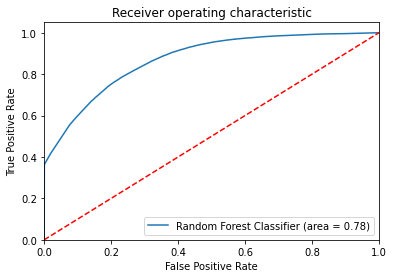

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [ ]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train.head(5)

In [ ]:
df_train['y'].value_counts()

In [ ]:
source = df_train.groupby(['y']).agg(frequency=("x4_RESIDENCE - APT. HOUSE", "sum")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='y:N',
    y='frequency:Q',
    color = 'y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of x4_RESIDENCE - APT. HOUSE between classes")

In [ ]:
source = df_train.groupby(['y']).agg(frequency=("x9_Day", "sum")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='y:N',
    y='frequency:Q',
    color = 'y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of x9_Day between classes")

In [ ]:
source = df_train.groupby(['y']).agg(frequency=("x4_STREET", "sum")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='y:N',
    y='frequency:Q',
    color = 'y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of x4_STREET between classes")

In [ ]:
cut_labels_4 = ['Very Short', 'Short', 'Medium', 'Long']
cut_bins_4 = [-0.5,0.875,2.25,3.625,5]
tmp = df_train
tmp['dur_cut'] = pd.cut(tmp['Duration'],bins=cut_bins_4,labels=cut_labels_4)
source = tmp.groupby(['y','dur_cut']).agg(frequency=("Duration", "count")).reset_index()

alt.Chart(source).mark_bar().encode(
    x='dur_cut:N',
    y='frequency:Q',
    color = 'y:N',
    column='y:N',
    tooltip = ['y:N','frequency:Q']
).properties(width=400,height=400,title="Distribution of Duration")

## Grid Search

In [24]:
#Set up the parameters for grid search
parameters = {'n_estimators' : (10,30,50,70,90),
              'criterion' : ('gini','entropy'),
              'max_depth' : (3,5,7,9,10),
              'max_features' : ('auto','sqrt'),
              'min_samples_split' : (2,4,6)
             }

In [25]:
clf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [26]:
clf_grid_model = clf_grid.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 53.7min finished


In [27]:
clf_grid_model.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=90, n_jobs=-1)

In [28]:
clf_grid_model.best_score_

0.7662993671147879

In [16]:
clf = RandomForestClassifier(bootstrap=True,
                             class_weight=None,
                             criterion= 'gini',
                             max_depth= 10,
                             max_features= 'sqrt',
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             min_impurity_split=None,
                             min_samples_leaf=1,
                             min_samples_split= 4,
                             min_weight_fraction_leaf=0.0,
                             n_estimators= 90,
                             n_jobs=-1,
                             oob_score=False,
                             random_state=0,
                             verbose=0,
                             warm_start=False
                            )

In [17]:
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       n_estimators=90, n_jobs=-1, random_state=0)

## Test the best model

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print(f'Test Accuracy: {clf.score(X_test, y_test):.3f}')
print(f'Train Accuracy: {clf.score(X_train, y_train):.3f}')
print(f'Holdout Accuracy: {clf.score(X_holdout, y_holdout):.3f}')

Test Accuracy: 0.712
Train Accuracy: 0.765
Holdout Accuracy: 0.716


In [20]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     72942
           1       0.53      0.62      0.57     32833

    accuracy                           0.71    105775
   macro avg       0.67      0.69      0.68    105775
weighted avg       0.73      0.71      0.72    105775



In [21]:
#classification report on y_holdout
y_pred_holdout = clf.predict(X_holdout)
print(classification_report(y_holdout,y_pred_holdout))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     40568
           1       0.54      0.62      0.58     18196

    accuracy                           0.72     58764
   macro avg       0.68      0.69      0.68     58764
weighted avg       0.73      0.72      0.72     58764



<AxesSubplot:>

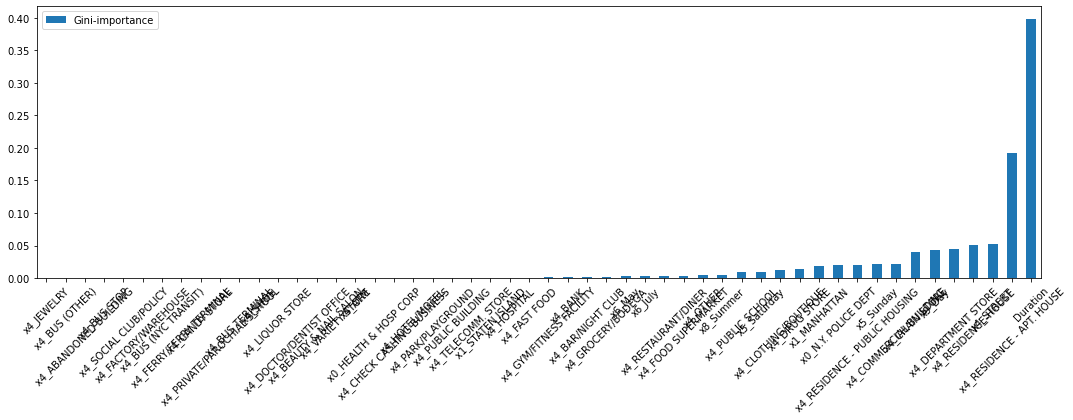

In [22]:
#get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(figsize=(18,5),kind='bar', rot=45)

In [23]:
df_top_features = importances
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

,Gini-importance,feature
Duration,3.976028e-01,Duration
x4_RESIDENCE - APT. HOUSE,1.914665e-01,x4_RESIDENCE - APT. HOUSE
x4_STREET,5.214039e-02,x4_STREET
x4_RESIDENCE-HOUSE,5.146215e-02,x4_RESIDENCE-HOUSE
x4_DEPARTMENT STORE,4.457503e-02,x4_DEPARTMENT STORE
x9_Day,4.313168e-02,x9_Day
x4_CHAIN STORE,4.010418e-02,x4_CHAIN STORE
x4_COMMERCIAL BUILDING,2.157313e-02,x4_COMMERCIAL BUILDING
x5_Sunday,2.146273e-02,x5_Sunday
x4_RESIDENCE - PUBLIC HOUSING,2.082033e-02,x4_RESIDENCE - PUBLIC HOUSING


In [66]:
df_top_features.dtypes

Gini-importance    float64
feature             object
dtype: object

In [24]:
alt.Chart(df_top_features).mark_bar().encode(
    x=alt.Y('feature:N',sort='-y'),
    y='Gini-importance:Q',
    tooltip=['feature','Gini-importance']
).properties(title="Feature Importance")

alt.Chart(...)

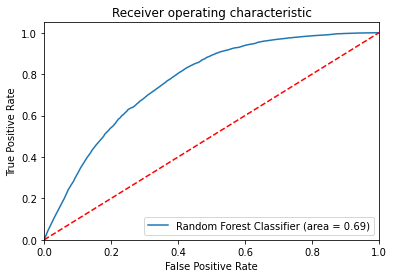

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

## find the best threshold

In [27]:
def getThreshold(y_test, probs, pos_label):
    probs = probs.T[1]
    actual = np.array([y_test == pos_label]).astype(int)[0]
    resultsdf = pd.DataFrame(data = {'Actual':actual, 'Probability':probs})
    tplist = []
    tnlist = []
    fplist = []
    fnlist = []
    threshlist = []
    for thresh in np.linspace(0,1,num=51):
        y_pred = probs > thresh
        tplist.append((resultsdf['Actual'] * y_pred).sum())
        tnlist.append(((1 - resultsdf['Actual']) * (1 - y_pred)).sum())
        fplist.append(((1 - resultsdf['Actual']) * y_pred).sum())
        fnlist.append((resultsdf['Actual'] * (1 - y_pred)).sum())
        threshlist.append(thresh)
    accdf = pd.DataFrame(data = {'Threshold':threshlist, 'TP':tplist, 'TN':tnlist, 'FP':fplist, 'FN':fnlist})
    accdf['Accuracy'] = (accdf['TP'] + accdf['TN']) / (accdf['TP'] + accdf['FP'] + accdf['TN'] + accdf['FN'])
    accdf['Precision'] = accdf['TP'] / (accdf['TP'] + accdf['FP'])
    accdf['Recall / Sensitivity'] = accdf['TP'] / (accdf['TP'] + accdf['FN'])
    accdf['Specificity'] = accdf['TN'] / (accdf['TN'] + accdf['TP'])
    accdf['F1'] = 2*((accdf['Precision'] * accdf['Recall / Sensitivity']) / (accdf['Precision'] + accdf['Recall / Sensitivity']))
    return accdf

In [28]:
accdf = getThreshold(y_test,clf.predict_proba(X_test),pos_label=1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,32833,0,72942,0,0.310404,0.310404,1.000000,0.000000,0.473753
1,0.02,32833,0,72942,0,0.310404,0.310404,1.000000,0.000000,0.473753
2,0.04,32833,0,72942,0,0.310404,0.310404,1.000000,0.000000,0.473753
3,0.06,32833,11,72931,0,0.310508,0.310436,1.000000,0.000335,0.473791
4,0.08,32828,517,72425,5,0.315245,0.311896,0.999848,0.015505,0.475472
5,0.10,32807,1801,71141,26,0.327185,0.315610,0.999208,0.052040,0.479701
6,0.12,32691,7913,65029,142,0.383871,0.334537,0.995675,0.194882,0.500808
7,0.14,32560,10398,62544,273,0.406126,0.342362,0.991685,0.242050,0.509001
8,0.16,32469,12136,60806,364,0.421697,0.348100,0.988914,0.272077,0.514940
9,0.18,32327,14951,57991,506,0.446968,0.357924,0.984589,0.316236,0.524998


## Using the selected threshold, evaluate test set score

In [29]:
#.60 threshold has highest precision and accuracy
proba = clf.predict_proba(X_test)
threshold_predict = np.where(proba[:,1] > .7,1,0)
threshold_predict

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_test,threshold_predict))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82     72942
           1       0.60      0.23      0.33     32833

    accuracy                           0.71    105775
   macro avg       0.67      0.58      0.57    105775
weighted avg       0.69      0.71      0.67    105775



## Evaluate threshold on holdout set

In [31]:
accdf = getThreshold(y_holdout,clf.predict_proba(X_holdout),pos_label=1)
accdf

,Threshold,TP,TN,FP,FN,Accuracy,Precision,Recall / Sensitivity,Specificity,F1
0,0.00,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
1,0.02,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
2,0.04,18196,0,40568,0,0.309645,0.309645,1.000000,0.000000,0.472869
3,0.06,18196,6,40562,0,0.309747,0.309677,1.000000,0.000330,0.472906
4,0.08,18193,280,40288,3,0.314359,0.311092,0.999835,0.015157,0.474536
5,0.10,18181,1063,39505,15,0.327479,0.315172,0.999176,0.055238,0.479191
6,0.12,18113,4520,36048,83,0.385151,0.334429,0.995439,0.199708,0.500656
7,0.14,18053,5810,34758,143,0.406082,0.341842,0.992141,0.243473,0.508485
8,0.16,17989,6782,33786,207,0.421534,0.347446,0.988624,0.273788,0.514184
9,0.18,17914,8345,32223,282,0.446855,0.357301,0.984502,0.317796,0.524315


In [32]:
source = accdf
source['opt'] = .7

base = alt.Chart(source)

#red
acc= base.mark_line(color="#fc030f").encode(
    x='Threshold:Q',
    y='Accuracy:Q'
)
#green
prec = base.mark_line(color="#136e1a").encode(
    x='Threshold:Q',
    y='Precision:Q'
)
#blue
rec = base.mark_line(color="#3a3b9c").encode(
    x='Threshold:Q',
    y='Recall / Sensitivity:Q'
)
#orange
spec = base.mark_line(color="#ebac00").encode(
    x='Threshold:Q',
    y='Specificity:Q'
)

optimal = base.mark_rule().encode(
    x='opt'
)
acc+prec+rec+spec+optimal

alt.LayerChart(...)

In [33]:
#.54 threshold has highest precision, recall and accuracy
proba = clf.predict_proba(X_holdout)
threshold_predict = np.where(proba[:,1] > 0.7,1,0)
threshold_predict

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
#classification report on y_test
from sklearn.metrics import *

#Compute precision, recall, F-measure and support
print(classification_report(y_holdout,threshold_predict))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82     40568
           1       0.61      0.23      0.34     18196

    accuracy                           0.72     58764
   macro avg       0.67      0.58      0.58     58764
weighted avg       0.69      0.72      0.67     58764

